<a href="https://colab.research.google.com/github/izzuddinm/BasicHTMLCodingRepository/blob/main/Final_Project_ClasificationImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Package Terlebih Dahulu

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from numpy import asarray

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)



68606236/68606236 [==============================] - 1s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


1

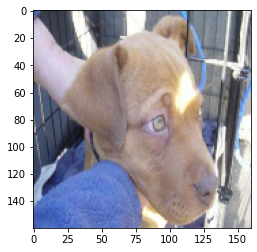

In [ ]:
for images, labels in train_dataset.take(1):
  images = images.numpy()
  labels = labels.numpy()

plt.imshow(images[0].astype("uint8"))
labels[3]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(120, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

# model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

MobileNetV2.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)
x = MobileNetV2(x, training= False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

modelKu = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
modelKu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [ ]:
loss0, accuracy0 = modelKu.evaluate(validation_dataset)

32/32 [==============================] - 19s 549ms/step - loss: 0.8410 - accuracy: 0.4440


In [ ]:
initial_epochs = 5
history = modelKu.fit(train_dataset, epochs=initial_epochs, validation_data=validation_dataset)

Epoch 1/5
63/63 [==============================] - 60s 903ms/step - loss: 0.7190 - accuracy: 0.5650 - val_loss: 0.5281 - val_accuracy: 0.7580
Epoch 2/5
63/63 [==============================] - 60s 957ms/step - loss: 0.4772 - accuracy: 0.8030 - val_loss: 0.3688 - val_accuracy: 0.8860
Epoch 3/5
63/63 [==============================] - 59s 924ms/step - loss: 0.3410 - accuracy: 0.8830 - val_loss: 0.2788 - val_accuracy: 0.9420
Epoch 4/5
63/63 [==============================] - 63s 1s/step - loss: 0.2706 - accuracy: 0.9235 - val_loss: 0.2243 - val_accuracy: 0.9550
Epoch 5/5
63/63 [==============================] - 56s 877ms/step - loss: 0.2269 - accuracy: 0.9330 - val_loss: 0.1875 - val_accuracy: 0.9660


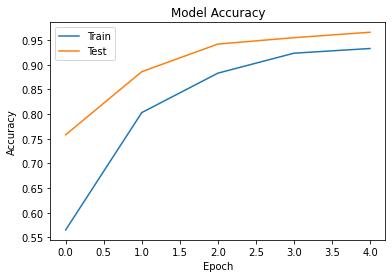

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
MobileNetV2.trainable = True

In [ ]:
for layer in MobileNetV2.layers[:100]:
  layer.trainable = False

In [ ]:
modelKu.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
                metrics=['accuracy'])


In [ ]:
fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs

history_fine = modelKu.fit(train_dataset, epochs=total_epochs, initial_epoch=history.epoch[-1], validation_data=validation_dataset)

Epoch 5/10


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 88s 1s/step - loss: 0.0798 - accuracy: 0.9765 - val_loss: 0.0522 - val_accuracy: 0.9810
Epoch 6/10
63/63 [==============================] - 85s 1s/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0467 - val_accuracy: 0.9790
Epoch 7/10
63/63 [==============================] - 83s 1s/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.0507 - val_accuracy: 0.9790
Epoch 8/10
63/63 [==============================] - 84s 1s/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0492 - val_accuracy: 0.9830
Epoch 9/10
63/63 [==============================] - 83s 1s/step - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0687 - val_accuracy: 0.9770
Epoch 10/10
63/63 [==============================] - 84s 1s/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0451 - val_accuracy: 0.9860


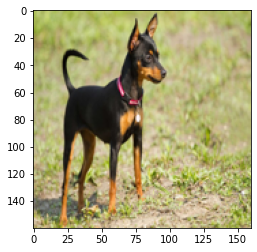

In [ ]:
gbr = Image.open('anjing.jpg')
gbr = gbr.convert('RGB')
gbr = gbr.resize((160,160))
gbr = asarray(gbr)

plt.imshow(gbr)

In [ ]:
gbr=np.expand_dims(gbr, axis=0)

In [ ]:
 p=modelKu(gbr)
 p=np.round(p)

In [ ]:
if(p == 0):
  print('Hewan ini di Indentifikasi sebagai " KUCING " ')
else:
  print('Hewan ini di Indentifikasi sebagai " ANJING " ')
  

Hewan ini di Indentifikasi sebagai " ANJING " 
